2(cont). What offender type committed the most hate crimes for the category of race in the US? How does this compare to local data from NC?

Although the percentages are similar, the percentage of black offenders in NC is slightly higher than the national percentage. The percentage of white offenders in NC is slightly lower than the national percentage. 

In [1]:
#Dependencies and Setup
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import numpy as np

#file to load
hateCrimeNCPath = "hate_crime/Hate Crimes in NC 1991-2020.csv"
#read the hate crime data csv
hateCrimeNcData = pd.read_csv(hateCrimeNCPath)

hateCrimeNcData.head()

,Unnamed: 0,INCIDENT_ID,DATA_YEAR,ORI,PUB_AGENCY_NAME,PUB_AGENCY_UNIT,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,...,OFFENDER_RACE,OFFENDER_ETHNICITY,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS
0,7277,7474,1992,NC0680400,University of North Carolina:,Chapel Hill,University or College,NC,North Carolina,South Atlantic,...,Unknown,NaN,1,Intimidation,1.0,Hotel/Motel/Etc.,"Anti-Lesbian, Gay, Bisexual, or Transgender (M...",Individual,S,S
1,14709,14462,1993,NC0320200,North Carolina Central University,NaN,University or College,NC,North Carolina,South Atlantic,...,Black or African American,NaN,1,Simple Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,S,S
2,14710,14463,1993,NC0340200,Winston-Salem,NaN,City,NC,North Carolina,South Atlantic,...,White,NaN,1,Aggravated Assault,1.0,Hotel/Motel/Etc.,Anti-Black or African American,Individual,S,S
3,14711,14464,1993,NC0360600,Gastonia,NaN,City,NC,North Carolina,South Atlantic,...,Black or African American,NaN,1,Aggravated Assault,1.0,School/College,Anti-White,Individual,S,S
4,14712,14465,1993,NC0360600,Gastonia,NaN,City,NC,North Carolina,South Atlantic,...,Black or African American,NaN,8,Aggravated Assault;Destruction/Damage/Vandalis...,4.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Government;Individual,M,S


In [2]:
#New dataframe with offender name and bias description
newHateCrimeNcDF = hateCrimeNcData [['OFFENDER_RACE', 'BIAS_DESC']]
newHateCrimeNcDF

,OFFENDER_RACE,BIAS_DESC
0,Unknown,"Anti-Lesbian, Gay, Bisexual, or Transgender (M..."
1,Black or African American,Anti-White
2,White,Anti-Black or African American
3,Black or African American,Anti-White
4,Black or African American,Anti-White
...,...,...
2843,Multiple,Anti-Black or African American
2844,Unknown,Anti-White
2845,Black or African American,Anti-White
2846,White,Anti-Gay (Male)


In [3]:
#count the offenders by race
offenderCount = newHateCrimeNcDF["OFFENDER_RACE"].value_counts()
offenderCount

OFFENDER_RACE
White                               1132
Unknown                             1095
Black or African American            549
Multiple                              56
Asian                                 11
American Indian or Alaska Native       5
Name: count, dtype: int64

# White

In [13]:
whiteBlackCrime = newHateCrimeNcDF[(newHateCrimeNcDF["OFFENDER_RACE"]=='White'
)&(newHateCrimeNcDF["BIAS_DESC"] =="Anti-Black or African American")].value_counts()

whiteBlack = whiteBlackCrime .sum()

whiteBlack

672

In [15]:
whiteWhiteCrime = newHateCrimeNcDF[(newHateCrimeNcDF["OFFENDER_RACE"]=='White'
)&(newHateCrimeNcDF["BIAS_DESC"] =="Anti-White")].value_counts()

whiteWhite = whiteWhiteCrime .sum()

whiteWhite

25

In [14]:
whiteArabCrime = newHateCrimeNcDF[(newHateCrimeNcDF["OFFENDER_RACE"]=='White'
)&(newHateCrimeNcDF["BIAS_DESC"] =="Anti-Arab")].value_counts()

whiteArab = whiteArabCrime .sum()

whiteArab

1

In [16]:
whiteHispanicCrime = newHateCrimeNcDF[(newHateCrimeNcDF["OFFENDER_RACE"]=='White'
)&(newHateCrimeNcDF["BIAS_DESC"] =="Anti-Hispanic or Latino")].value_counts()

whiteHispanic = whiteHispanicCrime .sum()

whiteHispanic

73

In [17]:
whiteNativeCrime = newHateCrimeNcDF[(newHateCrimeNcDF["OFFENDER_RACE"]=='White'
)&(newHateCrimeNcDF["BIAS_DESC"] =="Anti-American Indian or Alaska Native")].value_counts()

whiteNative = whiteNativeCrime .sum()

whiteNative

6

In [18]:
whiteOtherCrime = newHateCrimeNcDF[(newHateCrimeNcDF["OFFENDER_RACE"]=='White'
)&(newHateCrimeNcDF["BIAS_DESC"] =="Anti-Other Race/Ethnicity/Ancestry")].value_counts()

whiteOther = whiteOtherCrime .sum()

whiteOther

41

In [19]:
whiteMultipleCrime = newHateCrimeNcDF[(newHateCrimeNcDF["OFFENDER_RACE"]=='White'
)&(newHateCrimeNcDF["BIAS_DESC"] =="Anti-Multiple Races, Group")].value_counts()

whiteMultiple = whiteMultipleCrime .sum()

whiteMultiple

44

In [36]:
whiteAsianCrime = newHateCrimeNcDF[(newHateCrimeNcDF["OFFENDER_RACE"]=='White'
)&(newHateCrimeNcDF["BIAS_DESC"] =="Anti-Asian")].value_counts()

whiteAsian = whiteAsianCrime .sum()

whiteAsian

14

# Black

In [21]:
blackBlackCrime = newHateCrimeNcDF[(newHateCrimeNcDF["OFFENDER_RACE"]=='Black or African American'
)&(newHateCrimeNcDF["BIAS_DESC"] =="Anti-Black or African American")].value_counts()

blackBlack = blackBlackCrime .sum()

blackBlack

33

In [37]:
blackArabCrime = newHateCrimeNcDF[(newHateCrimeNcDF["OFFENDER_RACE"]=='Black or African American'
)&(newHateCrimeNcDF["BIAS_DESC"] =="Anti-Arab")].value_counts()

blackArab = blackArabCrime .sum()

blackArab

1

In [22]:
blackWhiteCrime = newHateCrimeNcDF[(newHateCrimeNcDF["OFFENDER_RACE"]=='Black or African American'
)&(newHateCrimeNcDF["BIAS_DESC"] =="Anti-White")].value_counts()

blackWhite = blackWhiteCrime .sum()

blackWhite

257

In [23]:
blackHispanicCrime = newHateCrimeNcDF[(newHateCrimeNcDF["OFFENDER_RACE"]=='Black or African American'
)&(newHateCrimeNcDF["BIAS_DESC"] =="Anti-Hispanic or Latino")].value_counts()

blackHispanic = blackHispanicCrime .sum()

blackHispanic

58

In [24]:
blackAsianCrime = newHateCrimeNcDF[(newHateCrimeNcDF["OFFENDER_RACE"]=='Black or African American'
)&(newHateCrimeNcDF["BIAS_DESC"] =="Anti-Asian")].value_counts()

blackAsian = blackAsianCrime .sum()

blackAsian

2

In [25]:
blackNativeCrime = newHateCrimeNcDF[(newHateCrimeNcDF["OFFENDER_RACE"]=='Black or African American'
)&(newHateCrimeNcDF["BIAS_DESC"] =="Anti-American Indian or Alaska Native")].value_counts()

blackNative = blackNativeCrime .sum()

blackNative

2

In [26]:
blackOtherCrime = newHateCrimeNcDF[(newHateCrimeNcDF["OFFENDER_RACE"]=='Black or African American'
)&(newHateCrimeNcDF["BIAS_DESC"] =="Anti-Other Race/Ethnicity/Ancestry")].value_counts()

blackOther = blackOtherCrime .sum()

blackOther

14

In [27]:
blackMultipleCrime = newHateCrimeNcDF[(newHateCrimeNcDF["OFFENDER_RACE"]=='Black or African American'
)&(newHateCrimeNcDF["BIAS_DESC"] =="Anti-Multiple Races, Group")].value_counts()

blackMultiple = blackMultipleCrime .sum()

blackMultiple

14

# Asian

In [28]:
asianBlackCrime = newHateCrimeNcDF[(newHateCrimeNcDF["OFFENDER_RACE"]=='Asian'
)&(newHateCrimeNcDF["BIAS_DESC"] =="Anti-Black or African American")].value_counts()

asianBlack = asianBlackCrime .sum()

asianBlack

3

In [29]:
asianWhiteCrime = newHateCrimeNcDF[(newHateCrimeNcDF["OFFENDER_RACE"]=='Asian'
)&(newHateCrimeNcDF["BIAS_DESC"] =="Anti-White")].value_counts()

asianWhite = asianWhiteCrime .sum()

asianWhite

0

In [30]:
asianAsianCrime = newHateCrimeNcDF[(newHateCrimeNcDF["OFFENDER_RACE"]=='Asian'
)&(newHateCrimeNcDF["BIAS_DESC"] =="Anti-Asian")].value_counts()

asianAsian = asianAsianCrime .sum()

asianAsian

0

In [31]:
asianHispanicCrime = newHateCrimeNcDF[(newHateCrimeNcDF["OFFENDER_RACE"]=='Asian'
)&(newHateCrimeNcDF["BIAS_DESC"] =="Anti-Hispanic or Latino")].value_counts()

asianHispanic = asianHispanicCrime .sum()

asianHispanic

2

In [32]:
asianArabCrime = newHateCrimeNcDF[(newHateCrimeNcDF["OFFENDER_RACE"]=='Asian'
)&(newHateCrimeNcDF["BIAS_DESC"] =="Anti-Arab")].value_counts()

asianArab = asianArabCrime .sum()

asianArab

0

In [33]:
asianNativeCrime = newHateCrimeNcDF[(newHateCrimeNcDF["OFFENDER_RACE"]=='Asian'
)&(newHateCrimeNcDF["BIAS_DESC"] =="Anti-American Indian or Alaska Native")].value_counts()

asianNative = asianNativeCrime .sum()

asianNative

1

In [34]:
asianOtherCrime = newHateCrimeNcDF[(newHateCrimeNcDF["OFFENDER_RACE"]=='Asian'
)&(newHateCrimeNcDF["BIAS_DESC"] =="Anti-Other Race/Ethnicity/Ancestry")].value_counts()

asianOther = asianOtherCrime .sum()

asianOther

1

In [35]:
asianMultipleCrime = newHateCrimeNcDF[(newHateCrimeNcDF["OFFENDER_RACE"]=='Asian'
)&(newHateCrimeNcDF["BIAS_DESC"] =="Anti-Multiple Races, Group")].value_counts()

asianMultiple = asianMultipleCrime .sum()

asianMultiple

0

# Multiple

In [38]:
multipleBlackCrime = newHateCrimeNcDF[(newHateCrimeNcDF["OFFENDER_RACE"]=='Multiple'
)&(newHateCrimeNcDF["BIAS_DESC"] =="Anti-Black or African American")].value_counts()

multipleBlack = multipleBlackCrime.sum()

multipleBlack

20

In [39]:
multipleWhiteCrime = newHateCrimeNcDF[(newHateCrimeNcDF["OFFENDER_RACE"]=='Multiple'
)&(newHateCrimeNcDF["BIAS_DESC"] =="Anti-White")].value_counts()

multipleWhite = multipleWhiteCrime.sum()

multipleWhite

5

In [40]:
multipleAsianCrime = newHateCrimeNcDF[(newHateCrimeNcDF["OFFENDER_RACE"]=='Multiple'
)&(newHateCrimeNcDF["BIAS_DESC"] =="Anti-Asian")].value_counts()

multipleAsian = multipleAsianCrime.sum()

multipleAsian

1

In [41]:
multipleArabCrime = newHateCrimeNcDF[(newHateCrimeNcDF["OFFENDER_RACE"]=='Multiple'
)&(newHateCrimeNcDF["BIAS_DESC"] =="Anti-Arab")].value_counts()

multipleArab = multipleArabCrime.sum()

multipleArab

0

In [42]:
multipleNativeCrime = newHateCrimeNcDF[(newHateCrimeNcDF["OFFENDER_RACE"]=='Multiple'
)&(newHateCrimeNcDF["BIAS_DESC"] =="Anti-American Indian or Alaska Native")].value_counts()

multipleNative = multipleNativeCrime.sum()

multipleNative

0

In [43]:
multipleMultipleCrime = newHateCrimeNcDF[(newHateCrimeNcDF["OFFENDER_RACE"]=='Multiple'
)&(newHateCrimeNcDF["BIAS_DESC"] =="Anti-Multiple Races, Group")].value_counts()

multipleMultiple = multipleMultipleCrime.sum()

multipleMultiple

2

In [44]:
multipleHispanicCrime = newHateCrimeNcDF[(newHateCrimeNcDF["OFFENDER_RACE"]=='Multiple'
)&(newHateCrimeNcDF["BIAS_DESC"] =="Anti-Hispanic or Latino")].value_counts()

multipleHispanic = multipleHispanicCrime.sum()

multipleHispanic

3

In [45]:
multipleOtherCrime = newHateCrimeNcDF[(newHateCrimeNcDF["OFFENDER_RACE"]=='Multiple'
)&(newHateCrimeNcDF["BIAS_DESC"] =="Other Race/Ethnicity/Ancestry")].value_counts()

multipleOther = multipleOtherCrime.sum()

multipleOther

0

# Native

In [46]:
nativeBlackCrime = newHateCrimeNcDF[(newHateCrimeNcDF["OFFENDER_RACE"]=='American Indian or Alaska Native'
)&(newHateCrimeNcDF["BIAS_DESC"] =="Anti-Black or African American")].value_counts()

nativeBlack = nativeBlackCrime.sum()

nativeBlack

1

In [47]:
nativeWhiteCrime = newHateCrimeNcDF[(newHateCrimeNcDF["OFFENDER_RACE"]=='American Indian or Alaska Native'
)&(newHateCrimeNcDF["BIAS_DESC"] =="Anti-White")].value_counts()

nativeWhite = nativeWhiteCrime.sum()

nativeWhite

1

In [50]:
nativeAsianCrime = newHateCrimeNcDF[(newHateCrimeNcDF["OFFENDER_RACE"]=='American Indian or Alaska Native'
)&(newHateCrimeNcDF["BIAS_DESC"] =="Anti-Asian")].value_counts()

nativeAsian = nativeAsianCrime.sum()

nativeAsian

0

In [51]:
nativeArabCrime = newHateCrimeNcDF[(newHateCrimeNcDF["OFFENDER_RACE"]=='American Indian or Alaska Native'
)&(newHateCrimeNcDF["BIAS_DESC"] =="Anti-Arab")].value_counts()

nativeArab = nativeArabCrime.sum()

nativeArab

0

In [52]:
nativeNativeCrime = newHateCrimeNcDF[(newHateCrimeNcDF["OFFENDER_RACE"]=='American Indian or Alaska Native'
)&(newHateCrimeNcDF["BIAS_DESC"] =="Anti-American Indian or Alaska Native")].value_counts()

nativeNative = nativeNativeCrime.sum()

nativeNative

1

In [53]:
nativeHispanicCrime = newHateCrimeNcDF[(newHateCrimeNcDF["OFFENDER_RACE"]=='American Indian or Alaska Native'
)&(newHateCrimeNcDF["BIAS_DESC"] =="Anti-Hispanic or Latino")].value_counts()

nativeHispanic = nativeHispanicCrime.sum()

nativeHispanic

1

In [54]:
nativeOtherCrime = newHateCrimeNcDF[(newHateCrimeNcDF["OFFENDER_RACE"]=='American Indian or Alaska Native'
)&(newHateCrimeNcDF["BIAS_DESC"] =="Anti-Other Race/Ethnicity/Ancestry")].value_counts()

nativeOther = nativeOtherCrime.sum()

nativeOther

0

In [55]:
nativeMultipleCrime = newHateCrimeNcDF[(newHateCrimeNcDF["OFFENDER_RACE"]=='American Indian or Alaska Native'
)&(newHateCrimeNcDF["BIAS_DESC"] =="Anti-Multiple Races, Group")].value_counts()

nativeMultiple = nativeMultipleCrime.sum()

nativeMultiple

0

In [61]:
nativeCount = [nativeMultiple, nativeOther, nativeHispanic, nativeNative, nativeAsian, nativeWhite, nativeBlack, nativeArab]

nativeSum = sum(nativeCount)

nativeSum

4

In [62]:
blackCount = [blackMultiple, blackOther, blackHispanic, blackNative, blackAsian, blackWhite, blackBlack, blackArab]

blackSum = sum(blackCount)

blackSum

381

In [63]:
whiteCount = [whiteMultiple, whiteOther, whiteHispanic, whiteNative, whiteAsian, whiteWhite, whiteBlack, whiteArab]

whiteSum = sum(whiteCount)

whiteSum

876

In [64]:
asianCount = [asianMultiple, asianOther, asianHispanic, asianNative, asianAsian, asianWhite, asianBlack, asianArab]

asianSum = sum(asianCount)

asianSum

7

In [65]:
multipleCount = [multipleMultiple, multipleOther, multipleHispanic, multipleNative, multipleAsian, multipleWhite, multipleBlack, multipleArab]

multipleSum = sum(multipleCount)

multipleSum

31

# Percentages
Calculate the percentages by offender race

In [70]:
totalRaceOffensesPerRaceNC = [multipleSum, blackSum, whiteSum, asianSum, nativeSum]
totalRaceOffensesPerRaceNCSum = sum(totalRaceOffensesPerRaceNC)

totalRaceOffensesPerRaceNCSum

1299

In [71]:
whiteRaceOffensesPercentage = whiteSum / float(totalRaceOffensesPerRaceNCSum) * 100
print (whiteRaceOffensesPercentage)

67.4364896073903


In [72]:
blackRaceOffensesPercentage = blackSum / float(totalRaceOffensesPerRaceNCSum) * 100
print (blackRaceOffensesPercentage)

29.330254041570434


In [73]:
asianRaceOffensesPercentage = asianSum / float(totalRaceOffensesPerRaceNCSum) * 100
print (asianRaceOffensesPercentage)

0.5388760585065435


In [74]:
nativeRaceOffensesPercentage = nativeSum / float(totalRaceOffensesPerRaceNCSum) * 100
print (nativeRaceOffensesPercentage)

0.30792917628945343


In [75]:
multipleRaceOffensesPercentage = multipleSum / float(totalRaceOffensesPerRaceNCSum) * 100
print (multipleRaceOffensesPercentage)

2.386451116243264


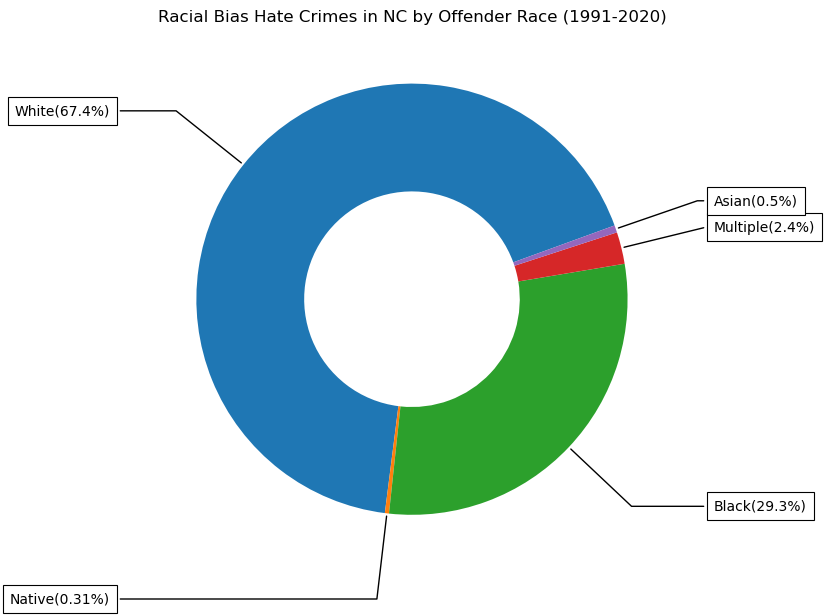

In [76]:
#visualize data
fig, ax = plt.subplots(figsize=(12, 7), subplot_kw=dict(aspect="equal"))

race = ["White(67.4%)","Native(0.31%)", "Black(29.3%)", "Multiple(2.4%)","Asian(0.5%)"]

data = [876,4,381,31,7]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=20)

bbox_props = dict(boxstyle="square,pad=0.5", fc="w", ec="k", lw=0.8)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(race[i], xy=(x, y), xytext=(1.4*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Racial Bias Hate Crimes in NC by Offender Race (1991-2020)")
plt.savefig("output_data/Fig8.png")
plt.show()